**Importing the libraries and keys**

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth',500)

In [2]:
log = pd.read_csv("Login.csv")
# Twitter Api Credentials
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

**Enter the name of the people to compare their tweets**


In [21]:
FirstPerson = "BillGates" 
SecondPerson = "realDonaldTrump"
tweetAmount = 200

In [23]:
# Extract 100 tweets from the first twitter user
FirstPosts = api.user_timeline(screen_name=FirstPerson, count = tweetAmount, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Showing the 3 recent tweets from %s:\n"%FirstPerson)
i=1
for tweet in FirstPosts[:3]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

# Extract 100 tweets from the second twitter user
SecondPosts = api.user_timeline(screen_name=SecondPerson, count = tweetAmount, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Showing the 3 recent tweets from %s:\n"%SecondPerson)
i=1
for tweet in SecondPosts[:3]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Showing the 3 recent tweets from BillGates:

1) Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because she knew it would improve life for everyone. America is a better place because of her service. I am inspired by her life and legacy. https://t.co/hFksGoIXXZ

2) My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.

https://t.co/OnAEsmosNb

3) Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they have me: https://t.co/DYFUYMEPK7 https://t.co/UKT9BfXHyk

Showing the 3 recent tweets from realDonaldTrump:

1) RT @TeamTrump: President @realDonaldTrump on the death of Justice Ruth Bader Ginsburg: "She led an amazing life...She was an amazing woman,…

2) RT @SenJohnThune: My full statement on the passing of Justice Ruth Bader Ginsburg below ⬇️.  We didn’t always agree, but RBG was a true pat…

3) Statement from the President on the P

In [24]:
# Create a dataframe with a column called Tweets for First Person
df1 = pd.DataFrame([tweet.full_text for tweet in FirstPosts], columns=['Tweets'])
# Show the first 5 rows of data
df1.head()


,Tweets
0,"Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because she knew it would improve life for everyone. America is a better place because of her service. I am inspired by her life and legacy. https://t.co/hFksGoIXXZ"
1,My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.\n\nhttps://t.co/OnAEsmosNb
2,Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they have me: https://t.co/DYFUYMEPK7 https://t.co/UKT9BfXHyk
3,These heroes represent the best of who we can be. Their efforts to solve the world’s challenges demonstrate our values as a society and they serve as powerful examples of how to make a positive difference in the world. https://t.co/u9n0WvN0EP
4,"RT @OurWorldInData: Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…"


In [25]:
# Create a dataframe with a column called Tweets for Second Person
df2 = pd.DataFrame([tweet.full_text for tweet in SecondPosts], columns=['Tweets'])
# Show the first 5 rows of data
df2.head()

,Tweets
0,"RT @TeamTrump: President @realDonaldTrump on the death of Justice Ruth Bader Ginsburg: ""She led an amazing life...She was an amazing woman,…"
1,"RT @SenJohnThune: My full statement on the passing of Justice Ruth Bader Ginsburg below ⬇️. We didn’t always agree, but RBG was a true pat…"
2,Statement from the President on the Passing of Supreme Court Associate Justice Ruth Bader Ginsburg https://t.co/N2YkGVWLoF
3,...Obama killed the pharmaceutical manufacturing business in Puerto Rico. We are bringing it back from China and other faraway lands.
4,"Today, I announced two of the LARGEST grants in history to Puerto Rico to rebuild its electrical grid system and education system. My Administration will be awarding $13 BILLION through FEMA – the largest obligations of funding ever awarded..."


In [26]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

In [27]:
# Clean the tweets
df1['Tweets'] = df1['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df1

,Tweets
0,"Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because she knew it would improve life for everyone. America is a better place because of her service. I am inspired by her life and legacy."
1,My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.\n\n
2,Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they have me:
3,These heroes represent the best of who we can be. Their efforts to solve the world’s challenges demonstrate our values as a society and they serve as powerful examples of how to make a positive difference in the world.
4,": Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…"
...,...
195,"Congrats to the 2019 winners of the in chemistry! Few inventions have changed our lives as much as the battery, and the quest to build a better one is an important step in the fight against climate change."
196,"Malnutrition is the single greatest health inequity in the world. In its 2019 State of the World’s Children report, takes a critical look at how we can help everyone reach their full potential by improving access to nutrition."
197,The world’s poorest people often rely on farming both to feed their families and to earn an income. They will be among the first to face the effects of climate change. I’m excited about innovations aimed at addressing this problem:
198,"Congrats to Esther Duflo, Abhijit Banerjee, and Michael Kremer for winning this year’s in economics. I’ve learned a lot from their pioneering work to better understand the complexities of the lives of the world’s poorest people."


In [28]:
# Clean the tweets
df2['Tweets'] = df2['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df2

,Tweets
0,": President on the death of Justice Ruth Bader Ginsburg: ""She led an amazing life...She was an amazing woman,…"
1,": My full statement on the passing of Justice Ruth Bader Ginsburg below ⬇️. We didn’t always agree, but RBG was a true pat…"
2,Statement from the President on the Passing of Supreme Court Associate Justice Ruth Bader Ginsburg
3,...Obama killed the pharmaceutical manufacturing business in Puerto Rico. We are bringing it back from China and other faraway lands.
4,"Today, I announced two of the LARGEST grants in history to Puerto Rico to rebuild its electrical grid system and education system. My Administration will be awarding $13 BILLION through FEMA – the largest obligations of funding ever awarded..."
...,...
195,: Big Tech is utterly terrifying right now. The World Health Organization is not our master and they are dangerously wrong w…
196,: Members of Biden’s campaign bailed out rioters in Minneapolis. His running mate solicited donations to the group doing this.…
197,": I just collated the data from the four Special Counsel's Office (SCO) iPhone inventory logs, equipment return logs, et…"
198,": 2—Four of the phone IDs appear in the inventory logs but are either missing or marked as ""N/A"" in the records officer'…"


In [29]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity




In [30]:
# Create two new columns 'Subjectivity' & 'Polarity'
df1['Subjectivity'] = df1['Tweets'].apply(getSubjectivity)
df1['Polarity'] = df1['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df1

,Tweets,Subjectivity,Polarity
0,"Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because she knew it would improve life for everyone. America is a better place because of her service. I am inspired by her life and legacy.",0.458333,0.166667
1,My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.\n\n,0.300000,0.200000
2,Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they have me:,0.350000,0.350000
3,These heroes represent the best of who we can be. Their efforts to solve the world’s challenges demonstrate our values as a society and they serve as powerful examples of how to make a positive difference in the world.,0.615152,0.509091
4,": Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…",0.642500,0.512500
...,...,...,...
195,"Congrats to the 2019 winners of the in chemistry! Few inventions have changed our lives as much as the battery, and the quest to build a better one is an important step in the fight against climate change.",0.450000,0.225000
196,"Malnutrition is the single greatest health inequity in the world. In its 2019 State of the World’s Children report, takes a critical look at how we can help everyone reach their full potential by improving access to nutrition.",0.712857,0.255714
197,The world’s poorest people often rely on farming both to feed their families and to earn an income. They will be among the first to face the effects of climate change. I’m excited about innovations aimed at addressing this problem:,0.541667,0.312500
198,"Congrats to Esther Duflo, Abhijit Banerjee, and Michael Kremer for winning this year’s in economics. I’ve learned a lot from their pioneering work to better understand the complexities of the lives of the world’s poorest people.",0.625000,0.500000


In [31]:
# Create two new columns 'Subjectivity' & 'Polarity'
df2['Subjectivity'] = df2['Tweets'].apply(getSubjectivity)
df2['Polarity'] = df2['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df2

,Tweets,Subjectivity,Polarity
0,": President on the death of Justice Ruth Bader Ginsburg: ""She led an amazing life...She was an amazing woman,…",0.900000,0.600000
1,": My full statement on the passing of Justice Ruth Bader Ginsburg below ⬇️. We didn’t always agree, but RBG was a true pat…",0.600000,0.350000
2,Statement from the President on the Passing of Supreme Court Associate Justice Ruth Bader Ginsburg,0.000000,0.000000
3,...Obama killed the pharmaceutical manufacturing business in Puerto Rico. We are bringing it back from China and other faraway lands.,0.125000,-0.108333
4,"Today, I announced two of the LARGEST grants in history to Puerto Rico to rebuild its electrical grid system and education system. My Administration will be awarding $13 BILLION through FEMA – the largest obligations of funding ever awarded...",0.000000,0.000000
...,...,...,...
195,: Big Tech is utterly terrifying right now. The World Health Organization is not our master and they are dangerously wrong w…,0.633929,-0.303571
196,: Members of Biden’s campaign bailed out rioters in Minneapolis. His running mate solicited donations to the group doing this.…,0.000000,0.000000
197,": I just collated the data from the four Special Counsel's Office (SCO) iPhone inventory logs, equipment return logs, et…",0.571429,0.357143
198,": 2—Four of the phone IDs appear in the inventory logs but are either missing or marked as ""N/A"" in the records officer'…",0.325000,-0.050000


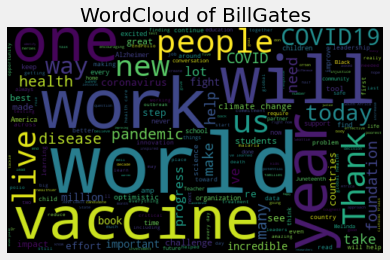

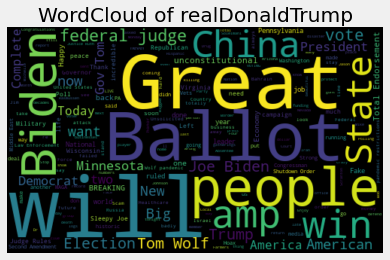

In [32]:
# word cloud visualization of First Person
allWords = ' '.join([twts for twts in df1['Tweets']])
FirstPersonWordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.title('WordCloud of %s'%FirstPerson)
plt.imshow(FirstPersonWordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


# word cloud visualization of Second Person
allWords = ' '.join([twts for twts in df2['Tweets']])
SecondPersonWordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.title('WordCloud of %s'%SecondPerson)
plt.imshow(SecondPersonWordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [33]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [34]:
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)# Show the dataframe
df1

,Tweets,Subjectivity,Polarity,Analysis
0,"Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because she knew it would improve life for everyone. America is a better place because of her service. I am inspired by her life and legacy.",0.458333,0.166667,Positive
1,My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.\n\n,0.300000,0.200000,Positive
2,Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they have me:,0.350000,0.350000,Positive
3,These heroes represent the best of who we can be. Their efforts to solve the world’s challenges demonstrate our values as a society and they serve as powerful examples of how to make a positive difference in the world.,0.615152,0.509091,Positive
4,": Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…",0.642500,0.512500,Positive
...,...,...,...,...
195,"Congrats to the 2019 winners of the in chemistry! Few inventions have changed our lives as much as the battery, and the quest to build a better one is an important step in the fight against climate change.",0.450000,0.225000,Positive
196,"Malnutrition is the single greatest health inequity in the world. In its 2019 State of the World’s Children report, takes a critical look at how we can help everyone reach their full potential by improving access to nutrition.",0.712857,0.255714,Positive
197,The world’s poorest people often rely on farming both to feed their families and to earn an income. They will be among the first to face the effects of climate change. I’m excited about innovations aimed at addressing this problem:,0.541667,0.312500,Positive
198,"Congrats to Esther Duflo, Abhijit Banerjee, and Michael Kremer for winning this year’s in economics. I’ve learned a lot from their pioneering work to better understand the complexities of the lives of the world’s poorest people.",0.625000,0.500000,Positive


In [35]:
df2['Analysis'] = df2['Polarity'].apply(getAnalysis)# Show the dataframe
df2

,Tweets,Subjectivity,Polarity,Analysis
0,": President on the death of Justice Ruth Bader Ginsburg: ""She led an amazing life...She was an amazing woman,…",0.900000,0.600000,Positive
1,": My full statement on the passing of Justice Ruth Bader Ginsburg below ⬇️. We didn’t always agree, but RBG was a true pat…",0.600000,0.350000,Positive
2,Statement from the President on the Passing of Supreme Court Associate Justice Ruth Bader Ginsburg,0.000000,0.000000,Neutral
3,...Obama killed the pharmaceutical manufacturing business in Puerto Rico. We are bringing it back from China and other faraway lands.,0.125000,-0.108333,Negative
4,"Today, I announced two of the LARGEST grants in history to Puerto Rico to rebuild its electrical grid system and education system. My Administration will be awarding $13 BILLION through FEMA – the largest obligations of funding ever awarded...",0.000000,0.000000,Neutral
...,...,...,...,...
195,: Big Tech is utterly terrifying right now. The World Health Organization is not our master and they are dangerously wrong w…,0.633929,-0.303571,Negative
196,: Members of Biden’s campaign bailed out rioters in Minneapolis. His running mate solicited donations to the group doing this.…,0.000000,0.000000,Neutral
197,": I just collated the data from the four Special Counsel's Office (SCO) iPhone inventory logs, equipment return logs, et…",0.571429,0.357143,Positive
198,": 2—Four of the phone IDs appear in the inventory logs but are either missing or marked as ""N/A"" in the records officer'…",0.325000,-0.050000,Negative


In [36]:
# Printing positive tweets of first person
print('Printing positive tweets of %s:\n' %FirstPerson)
j=1
sortedDF1 = df1.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF1.shape[0] ):
  if( sortedDF1['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF1['Tweets'][i])
    print()
    j= j+1

Printing positive tweets of BillGates:

1) Justice Ginsburg was a trailblazer who devoted her entire career to fighting for equal justice for women, because she knew it would improve life for everyone. America is a better place because of her service. I am inspired by her life and legacy. 

2) My dad was the “real” Bill Gates. He was everything I try to be and I will miss him every day.



3) Thank you to the heroes everywhere working to keep us safe. I hope their stories inspire you just as much as they have me:  

4) These heroes represent the best of who we can be. Their efforts to solve the world’s challenges demonstrate our values as a society and they serve as powerful examples of how to make a positive difference in the world. 

5) : Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…

6) Clinical trials are critical to helping researchers better understand Alzheimer's. Improving how we identify and enroll part

In [37]:
# Printing positive tweets of second person
print('Printing positive tweets of %s:\n' %SecondPerson)
j=1
sortedDF2 = df2.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF2.shape[0] ):
  if( sortedDF2['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF2['Tweets'][i])
    print()
    j= j+1

Printing positive tweets of realDonaldTrump:

1) : President  on the death of Justice Ruth Bader Ginsburg: "She led an amazing life...She was an amazing woman,…

2) : My full statement on the passing of Justice Ruth Bader Ginsburg below ⬇️.  We didn’t always agree, but RBG was a true pat…

3) ...Biden is a corrupt globalist sellout who never missed a chance to stab American workers in the back. If Biden wins, China wins – it’s just that simple!

4) Joe Biden says this is a race between Scranton and Park Avenue. This is a race between Scranton and China. Joe Biden betrayed Scranton, and America, to China and foreign countries. I will always put America First!

5) Will be landing in Minnesota shortly where early VOTING has begun, and Absentee Ballots (information below) are now being sent out. Wish I could vote there, but I’ll have to rely on you! Vote TrumpPence2020 


6) On my way to the Great State of Minnesota. See you soon! MAGA 

7) Happy RoshHashanah 

8) ...Sleepy Joe doesn’t hav

In [38]:
# Printing negative tweets of first person
print('Printing negative tweets of %s:\n' %FirstPerson)
j=1
sortedDF1 = df1.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF1.shape[0] ):
  if( sortedDF1['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF1['Tweets'][i])
    print()
    j=j+1
# Printing positive tweets of second person
print('Printing negative tweets of %s:\n' %SecondPerson)
j=1
sortedDF2 = df2.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF2.shape[0] ):
  if( sortedDF2['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF2['Tweets'][i])
    print()
    j=j+1

Printing negative tweets of BillGates:

1) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

2) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

3) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

4) : “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

5) : “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

6) : Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Uni

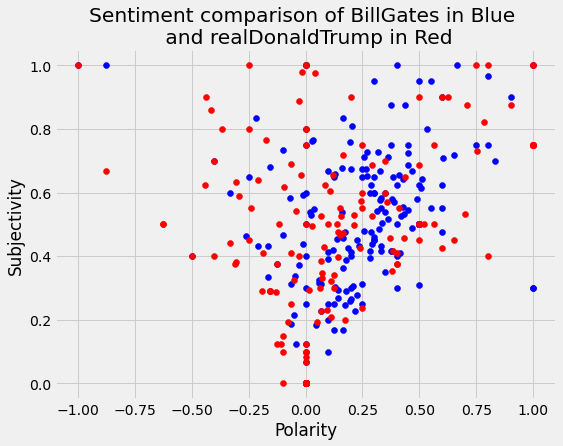

In [39]:
# Plotting point of first person
plt.figure(figsize=(8,6)) 
for i in range(0, df1.shape[0]):
  plt.scatter(df1["Polarity"][i], df1["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
for i in range(0, df2.shape[0]):
  plt.scatter(df2["Polarity"][i], df2["Subjectivity"][i], color='Red') # plt.scatter(x,y,color)
plt.title('Sentiment comparison of '+FirstPerson+' in Blue \n and '+SecondPerson+' in Red') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [40]:
# Print the percentage of positive tweets of first person
ptweets = df1[df1.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

FirstPersonPositivity = round( (ptweets.shape[0] / df1.shape[0]) * 100 , 1)

# Print the percentage of positive tweets of second person
ptweets = df2[df2.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

SecondPersonPositivity = round( (ptweets.shape[0] / df2.shape[0]) * 100 , 1)
print("Percentage of positive tweets of %s is "%FirstPerson , FirstPersonPositivity)
print("Percentage of positive tweets of %s is "%SecondPerson , SecondPersonPositivity)

Percentage of positive tweets of BillGates is  72.5
Percentage of positive tweets of realDonaldTrump is  42.0


In [41]:
# Print the percentage of negative tweets of first person
ptweets = df1[df1.Analysis == 'Negative']
ptweets = ptweets['Tweets']
ptweets

FirstPersonNegativity = round( (ptweets.shape[0] / df1.shape[0]) * 100 , 1)

# Print the percentage of positive tweets of second person
ptweets = df2[df2.Analysis == 'Negative']
ptweets = ptweets['Tweets']
ptweets

SecondPersonNegativity = round( (ptweets.shape[0] / df2.shape[0]) * 100 , 1)
print("Percentage of negative tweets of %s is "%FirstPerson , FirstPersonNegativity)
print("Percentage of negative tweets of %s is "%SecondPerson , SecondPersonNegativity)


Percentage of negative tweets of BillGates is  12.0
Percentage of negative tweets of realDonaldTrump is  23.5


In [42]:
# Show the value counts
print("Value count of "+FirstPerson)
df1['Analysis'].value_counts()

Value count of BillGates


Positive    145
Neutral      31
Negative     24
Name: Analysis, dtype: int64

In [43]:
print("Value count of "+SecondPerson)
df2['Analysis'].value_counts()

Value count of realDonaldTrump


Positive    84
Neutral     69
Negative    47
Name: Analysis, dtype: int64

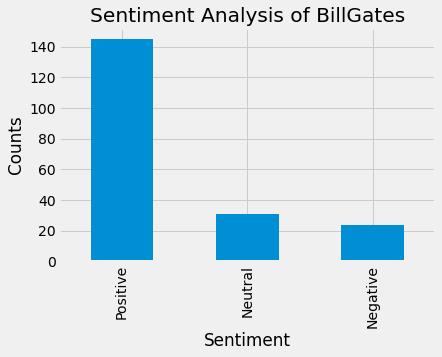

In [44]:
# Plotting and visualizing the tweets of first person
plt.title('Sentiment Analysis of %s'%FirstPerson)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df1['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

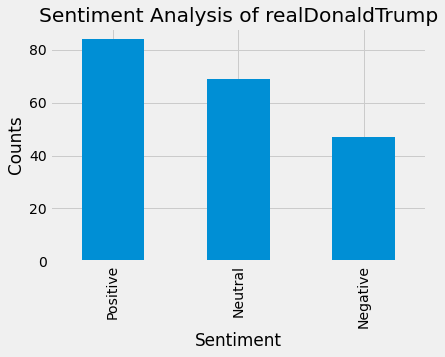

In [45]:
# Plotting and visualizing the tweets of second person
plt.title('Sentiment Analysis of %s'%SecondPerson)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df2['Analysis'].value_counts().plot(kind = 'bar')
plt.show()